In [1]:
#Prints **all** console output, not just last item in cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Overview-and-Requirements" data-toc-modified-id="Overview-and-Requirements-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview and Requirements</a></div><div class="lev1 toc-item"><a href="#Load-a-channel-distribution" data-toc-modified-id="Load-a-channel-distribution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load a channel distribution</a></div><div class="lev1 toc-item"><a href="#Plots/tables-of-a-channel-distribution" data-toc-modified-id="Plots/tables-of-a-channel-distribution-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plots/tables of a channel distribution</a></div><div class="lev2 toc-item"><a href="#Uniphones:-pick-a-source-sound-x-to-analyze" data-toc-modified-id="Uniphones:-pick-a-source-sound-x-to-analyze-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Uniphones: pick a source sound $x$ to analyze</a></div><div class="lev2 toc-item"><a href="#Triphones:-pick-a-sound-context-pair-to-analyze" data-toc-modified-id="Triphones:-pick-a-sound-context-pair-to-analyze-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Triphones: pick a sound-context pair to analyze</a></div><div class="lev2 toc-item"><a href="#Triphones:-pick-a-sound-to-analyze" data-toc-modified-id="Triphones:-pick-a-sound-to-analyze-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Triphones: pick a sound to analyze</a></div><div class="lev2 toc-item"><a href="#Triphones:-pick-a-context-to-analyze" data-toc-modified-id="Triphones:-pick-a-context-to-analyze-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Triphones: pick a context to analyze</a></div><div class="lev1 toc-item"><a href="#Features" data-toc-modified-id="Features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Features</a></div><div class="lev2 toc-item"><a href="#Alignment" data-toc-modified-id="Alignment-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Alignment</a></div><div class="lev3 toc-item"><a href="#Grab-a-feature-matrix" data-toc-modified-id="Grab-a-feature-matrix-411"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Grab a feature matrix</a></div><div class="lev3 toc-item"><a href="#Match-symbols-in-the-source-alphabet-to-feature-matrix-symbols" data-toc-modified-id="Match-symbols-in-the-source-alphabet-to-feature-matrix-symbols-412"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Match symbols in the source alphabet to feature matrix symbols</a></div><div class="lev3 toc-item"><a href="#Convert-IPA-symbols-to-tuples-of-FMs" data-toc-modified-id="Convert-IPA-symbols-to-tuples-of-FMs-413"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Convert IPA symbols to tuples of FMs</a></div>

# Overview and Requirements

**funcy**, **plotnine**

In [2]:
import csv, json

dottedStringToTuple = lambda ds: tuple(ds.split('.'))
tupleToDottedString = lambda t: '.'.join(t)
ds2t = dottedStringToTuple
t2ds = tupleToDottedString

leftEdge = '⋊'
rightEdge = '⋉'

from functools import reduce

import pandas as pd
from plotnine import *

import random
from random import choice

from math import log2

from frozendict import FrozenDict
import roman as r
import harpoon as pf

# Load a channel distribution

In [3]:
%pwd

'/Users/ericmeinhardt/Downloads/c2-jnA'

In [4]:
%ls *pYX*

Hammond-aligned_destressed_pseudocount0 pYX.json
Hammond-aligned_destressed_pseudocount0.01 pYX.json
IPhOD-aligned_destressed_pseudocount0 pYX.json
IPhOD-aligned_destressed_pseudocount0.01 pYX.json
unaligned_destressed_pseudocount0 pYX.json
unaligned_destressed_pseudocount0.01 pYX.json


In [5]:
which_alignment = 'Hammond-aligned'
# which_alignment = 'IPhOD-aligned'
# which_alignment = 'unaligned'

In [6]:
which_stress = 'destressed'
# which_stress = 'stressed'

In [7]:
# pseudocount = 0
pseudocount = 0.01
# pseudocount = 1

which_PC = 'pseudocount' + str(pseudocount)

In [8]:
which = '_'.join([which_alignment, which_stress, which_PC])
which
whichNoCount = '_'.join([which_alignment, which_stress])
whichNoCount

'Hammond-aligned_destressed_pseudocount0.01'

'Hammond-aligned_destressed'

In [9]:
uniphone_suff = ' pYX'
triphone_suff = ' pY1X0X1X2'
preview_suff = ' p3Y1X01'

file_ext = '.json'

uniphone_fn = which + uniphone_suff + file_ext
triphone_fn = which + triphone_suff + file_ext
preview_fn = which + preview_suff + file_ext

# response_triphone_list_filename = whichNoCount + ' response diphone-based' + ' ' + 'constructible triphones'

In [10]:
with open(uniphone_fn, encoding='utf-8') as data_file:
   uniph_dist = json.loads(data_file.read())

with open(triphone_fn, encoding='utf-8') as data_file:
   triph_dist = json.loads(data_file.read())

with open(preview_fn, encoding='utf-8') as data_file:
   preview_dist = json.loads(data_file.read())

In [11]:
len(uniph_dist)
len(triph_dist)
len(preview_dist)
# len(response_triphones)

40

11584

1293

In [12]:
pYX = uniph_dist
p3Y1X012 = triph_dist
p3Y1X01 = preview_dist

In [13]:
union = lambda Ss: reduce(set.union, Ss)

In [14]:
Xs = pYX.keys()
Ys = union([set(pYX[x].keys()) for x in Xs])
len(Xs)
len(Ys)
Xs - Ys
Ys - Xs

40

38

{'l̩', 'ə'}

set()

In [15]:
Xs

dict_keys(['l', 'd', 'r', 'v', 'θ', 'n', 'oʊ', 'ʌ', 'aʊ', 'ɚ', 'dʒ', 'w', 'g', 't', 'æ', 'ə', 'ʒ', 'z', 'ʊ', 'ʃ', 'ɪ', 'l̩', 'j', 'm', 'p', 'ɛ', 'tʃ', 'f', 'b', 'h', 'u', 'aɪ', 's', 'i', 'ŋ', 'k', 'ɔɪ', 'ɑ', 'ð', 'eɪ'])

In [16]:
Ys

{'aɪ',
 'aʊ',
 'b',
 'd',
 'dʒ',
 'eɪ',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'oʊ',
 'p',
 'r',
 's',
 't',
 'tʃ',
 'u',
 'v',
 'w',
 'z',
 'æ',
 'ð',
 'ŋ',
 'ɑ',
 'ɔɪ',
 'ɚ',
 'ɛ',
 'ɪ',
 'ʃ',
 'ʊ',
 'ʌ',
 'ʒ',
 'θ'}

In [17]:
XXXs = p3Y1X012.keys()
len(XXXs)
X012s = {each for each in XXXs if leftEdge not in each and rightEdge not in each}
len(X012s)

11584

8958

In [18]:
X1s = set([ds2t(each)[1] for each in X012s])
len(Xs)
len(X1s)
X1s - Xs
Xs - X1s
X1s

40

39

set()

{'l̩'}

{'aɪ',
 'aʊ',
 'b',
 'd',
 'dʒ',
 'eɪ',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'oʊ',
 'p',
 'r',
 's',
 't',
 'tʃ',
 'u',
 'v',
 'w',
 'z',
 'æ',
 'ð',
 'ŋ',
 'ɑ',
 'ɔɪ',
 'ə',
 'ɚ',
 'ɛ',
 'ɪ',
 'ʃ',
 'ʊ',
 'ʌ',
 'ʒ',
 'θ'}

# Plots/tables of a channel distribution

In [19]:
def getRandomKey(a_dict, printKey = False):
    randKey = random.choice(list(a_dict.keys()))
    if printKey:
        print('Random key: {0}'.format(randKey))
    return randKey

def testRandomKey(a_dict, printKey = True, printVal = True):
    randKey = getRandomKey(a_dict)
    if printKey:
        print('Random key: {0}'.format(randKey))
    if printVal:
        print('value ⟶ {0}'.format(a_dict[randKey]))
    return {'key': randKey, 'val': a_dict[randKey]}

In [20]:
def log(x):
    if x == 0.0:
        return 0.0
    return log2(x)

# def h(event, space):
#     p = P(event, space)
# #     p = space[event]
#     return -1.0 * log(p)

def h(p):
    return -1.0 * log(p)

## Uniphones: pick a source sound $x$ to analyze

In [21]:
Xs

dict_keys(['l', 'd', 'r', 'v', 'θ', 'n', 'oʊ', 'ʌ', 'aʊ', 'ɚ', 'dʒ', 'w', 'g', 't', 'æ', 'ə', 'ʒ', 'z', 'ʊ', 'ʃ', 'ɪ', 'l̩', 'j', 'm', 'p', 'ɛ', 'tʃ', 'f', 'b', 'h', 'u', 'aɪ', 's', 'i', 'ŋ', 'k', 'ɔɪ', 'ɑ', 'ð', 'eɪ'])

In [22]:
my_x = getRandomKey(pYX)
# my_x = 'ð'
my_x

'ɛ'

In [45]:
def channelDistToDF(y_label, p_label, my_source_seq, chanDist):
    mydf = [{y_label:y, p_label:chanDist[my_source_seq][y]} for y in chanDist[my_source_seq]]
    mydf = pd.DataFrame(data = mydf)
    return mydf

In [46]:
pYxDF = channelDistToDF('y', 'p(y|X = {0})'.format(my_x), my_x, pYX)
pYxDF

,p(y|X = ɛ),y
0,0.006654,l
1,0.007641,d
2,0.006766,r
3,0.006851,v
4,0.006685,θ
5,0.006502,n
6,0.007381,oʊ
7,0.022142,ʌ
8,0.009289,aʊ
9,0.008485,ɚ


In [47]:
# pYxDF = [{'y':y, 'p(y|X = {0})'.format(my_x):pYX[my_x][y]}
#          for y in pYX[my_x]]
# pYxDF = pd.DataFrame(data = pYxDF)
# pYxDF.head()

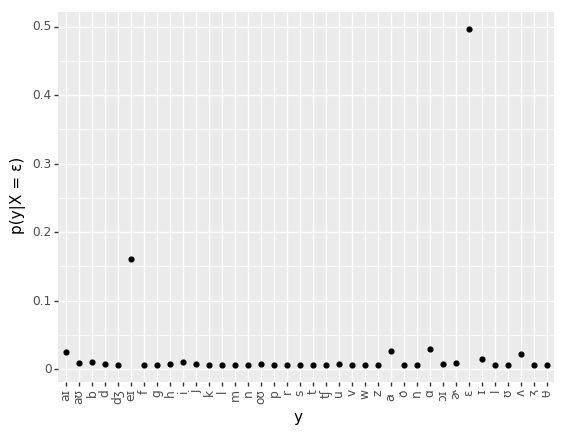

<ggplot: (7552139766)>

In [48]:
ggplot(pYxDF, aes(x="y", y='p(y|X = {0})'.format(my_x))) + geom_point() + theme(axis_text_x = element_text(rotation = 90))

In [25]:
pYxDF.sort_values(['p(y|X = {0})'.format(my_x)], ascending = [False])

,p(y|X = ɛ),y
23,0.496161,ɛ
37,0.161461,eɪ
34,0.030021,ɑ
14,0.027236,æ
29,0.025254,aɪ
7,0.022142,ʌ
19,0.015544,ɪ
26,0.011334,b
31,0.010319,i
8,0.009289,aʊ


In [26]:
hYxDF = [{'y':y, 'h(y|X = {0})'.format(my_x):h(pYX[my_x][y])}
         for y in pYX[my_x]]
hYxDF = pd.DataFrame(data = hYxDF)
hYxDF.head()

,h(y|X = ɛ),y
0,7.231581,l
1,7.032113,d
2,7.207523,r
3,7.189445,v
4,7.224844,θ


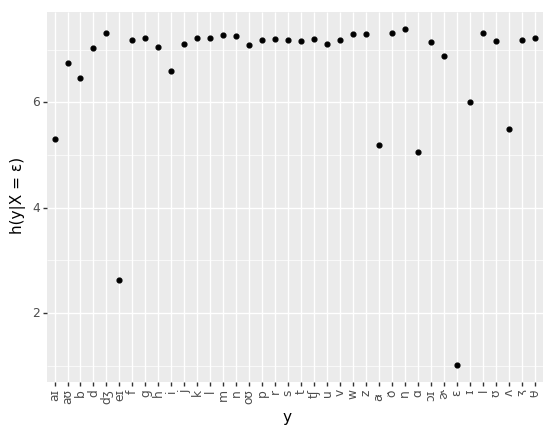

<ggplot: (-9223372029303835960)>

In [27]:
ggplot(hYxDF, aes(x="y", y='h(y|X = {0})'.format(my_x))) + geom_point() + theme(axis_text_x = element_text(rotation = 90))

In [28]:
hYxDF.sort_values(['h(y|X = {0})'.format(my_x)], ascending = [False])

,h(y|X = ɛ),y
32,7.390867,ŋ
36,7.321830,ð
10,7.321830,dʒ
18,7.321830,ʃ
11,7.305508,w
16,7.303313,z
21,7.282866,m
5,7.264839,n
0,7.231581,l
33,7.226922,k


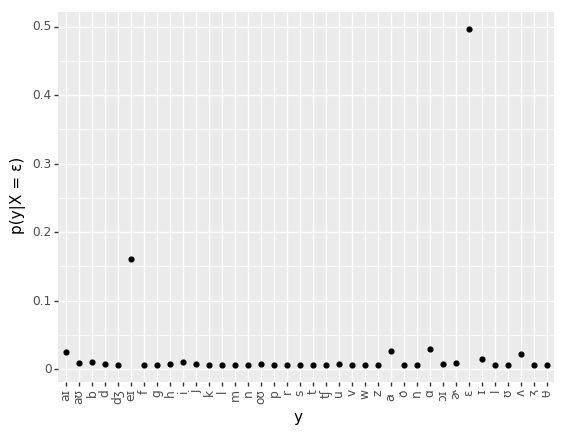

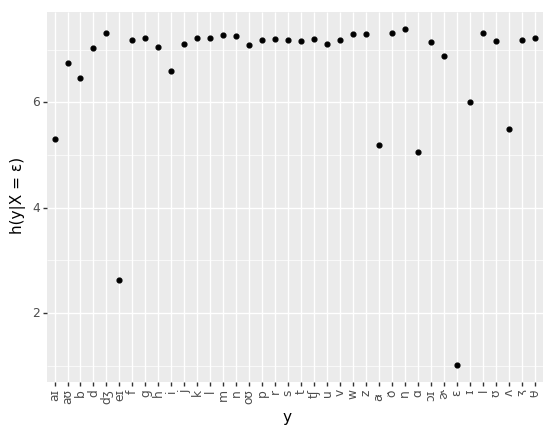

(    p(y|X = ɛ)   y
 23    0.496161   ɛ
 37    0.161461  eɪ
 34    0.030021   ɑ
 14    0.027236   æ
 29    0.025254  aɪ
 7     0.022142   ʌ
 19    0.015544   ɪ
 26    0.011334   b
 31    0.010319   i
 8     0.009289  aʊ
 9     0.008485   ɚ
 1     0.007641   d
 28    0.007554   h
 6     0.007381  oʊ
 20    0.007259   j
 27    0.007205   u
 35    0.007019  ɔɪ
 13    0.006958   t
 17    0.006941   ʊ
 22    0.006861   p
 15    0.006858   ʒ
 3     0.006851   v
 30    0.006851   s
 25    0.006847   f
 2     0.006766   r
 24    0.006766  tʃ
 12    0.006695   g
 4     0.006685   θ
 33    0.006675   k
 0     0.006654   l
 5     0.006502   n
 21    0.006422   m
 16    0.006331   z
 11    0.006322   w
 10    0.006250  dʒ
 36    0.006250   ð
 18    0.006250   ʃ
 32    0.005958   ŋ, <ggplot: (-9223372036579861374)>,     h(y|X = ɛ)   y
 32    7.390867   ŋ
 36    7.321830   ð
 10    7.321830  dʒ
 18    7.321830   ʃ
 11    7.305508   w
 16    7.303313   z
 21    7.282866   m
 5     7.264839   n
 0    

In [76]:
def channelDistAnalysis(y_label, p_label, h_label, my_source_seq, chanDist):
    my_p_df = channelDistToDF(y_label, p_label, my_source_seq, chanDist)
    my_p_plot = ggplot(my_p_df, aes(x=y_label, y=p_label)) + geom_point() + theme(axis_text_x = element_text(rotation = 90))
    
    my_h_df = pd.DataFrame(data = [{y_label:y, h_label:h(chanDist[my_source_seq][y])} for y in chanDist[my_source_seq]])
    my_h_plot = ggplot(my_h_df, aes(x="y", y=h_label)) + geom_point() + theme(axis_text_x = element_text(rotation = 90))
    
    return my_p_df.sort_values([p_label], ascending = [False]), my_p_plot, my_h_df.sort_values([h_label], ascending = [False]), my_h_plot
#     return my_p_df.sort_values([p_label], ascending = [False]), my_p_plot, my_h_df.sort_values([h_label], ascending = [False])#, my_h_plot

my_x_analysis = channelDistAnalysis('y','p(y|X = {0})'.format(my_x), 'h(y|X = {0})'.format(my_x), my_x, pYX)
my_x_analysis

## Triphones: pick a sound-context pair to analyze

In [29]:
set(XXXs)

{'ə.n.u',
 'g.l.ɪ',
 'eɪ.ɑ.n',
 't.p.æ',
 'ɪ.k.s',
 's.k.ə',
 'h.ɚ.aɪ',
 'k.eɪ.k',
 's.eɪ.k',
 '⋊.ɔɪ.ɛ',
 't.eɪ.k',
 'n.ʌ.l',
 'ɪ.n.f',
 'ɚ.p.ɛ',
 'd.w.ʊ',
 'ɚ.ɑ.r',
 '⋊.g.h',
 'f.ɪ.s',
 '⋊.ŋ.dʒ',
 'l.i.m',
 '⋊.p.j',
 'ʊ.l.ɑ',
 'u.p.ɚ',
 'p.ə.f',
 '⋊.ʌ.z',
 'v.ɑ.t',
 'aʊ.b.⋉',
 '⋊.g.t',
 'ə.m.j',
 '⋊.b.eɪ',
 'h.aɪ.b',
 'ʌ.m.ʃ',
 '⋊.v.f',
 'l.ɪ.g',
 'ɛ.s.i',
 'ɚ.ɪ.n',
 'ɪ.n.æ',
 'n.h.ɛ',
 'ɛ.p.j',
 'i.ʃ.eɪ',
 'd.ɚ.n',
 's.w.ɚ',
 'd.r.ɑ',
 'l.s.ə',
 'r.m.⋉',
 'ɑ.θ.ɪ',
 'ə.s.ə',
 '⋊.u.aɪ',
 'm.ə.n',
 'r.d.ɪ',
 'm.oʊ.s',
 'ɛ.d.ɪ',
 'l.t.aɪ',
 'h.w.⋉',
 '⋊.ð.r',
 '⋊.oʊ.ɚ',
 'eɪ.s.n',
 '⋊.ʊ.r',
 'æ.p.dʒ',
 '⋊.tʃ.ʊ',
 'v.ɚ.t',
 'ɛ.s.n',
 '⋊.ʃ.eɪ',
 'p.ə.t',
 'ð.ɚ.⋉',
 'i.ə.s',
 'b.aɪ.æ',
 'w.ɚ.d',
 's.d.u',
 '⋊.aɪ.m',
 'eɪ.s.b',
 'oʊ.r.d',
 'ŋ.k.f',
 '⋊.aɪ.ʒ',
 'aɪ.ɚ.n',
 '⋊.m.n',
 'r.aʊ.ə',
 'aɪ.r.oʊ',
 's.w.⋉',
 'z.ɛ.f',
 'n.g.eɪ',
 '⋊.oʊ.aʊ',
 't.ʌ.tʃ',
 'm.ɚ.z',
 'ɚ.v.d',
 'k.ɚ.ə',
 'ɑ.v.⋉',
 'z.n.⋉',
 'oʊ.m.i',
 'd.aʊ.ɪ',
 'aɪ.z.ɪ',
 't.ɑ.d',
 '⋊.k.ə',
 'eɪ.p.ɛ',
 'r.r.ɪ',
 '⋊.ɪ.g',
 's.

limit_output extension: Maximum message size of 10000 exceeded with 10394 characters

In [30]:
set(X012s)

{'ə.n.u',
 'g.l.ɪ',
 'eɪ.ɑ.n',
 't.p.æ',
 'ɪ.k.s',
 's.k.ə',
 'h.ɚ.aɪ',
 'k.eɪ.k',
 's.eɪ.k',
 't.eɪ.k',
 'n.ʌ.l',
 'ɪ.n.f',
 'ɚ.p.ɛ',
 'd.w.ʊ',
 'ɚ.ɑ.r',
 'f.ɪ.s',
 'l.i.m',
 'ʊ.l.ɑ',
 'u.p.ɚ',
 'p.ə.f',
 'v.ɑ.t',
 'ə.m.j',
 'h.aɪ.b',
 'ʌ.m.ʃ',
 'l.ɪ.g',
 'ɛ.s.i',
 'ɚ.ɪ.n',
 'ɪ.n.æ',
 'n.h.ɛ',
 'ɛ.p.j',
 'i.ʃ.eɪ',
 'd.ɚ.n',
 's.w.ɚ',
 'd.r.ɑ',
 'l.s.ə',
 'ɑ.θ.ɪ',
 'ə.s.ə',
 'm.ə.n',
 'r.d.ɪ',
 'm.oʊ.s',
 'ɛ.d.ɪ',
 'l.t.aɪ',
 'eɪ.s.n',
 'æ.p.dʒ',
 'v.ɚ.t',
 'ɛ.s.n',
 'p.ə.t',
 'i.ə.s',
 'b.aɪ.æ',
 'w.ɚ.d',
 's.d.u',
 'eɪ.s.b',
 'oʊ.r.d',
 'ŋ.k.f',
 'aɪ.ɚ.n',
 'r.aʊ.ə',
 'aɪ.r.oʊ',
 'z.ɛ.f',
 'n.g.eɪ',
 't.ʌ.tʃ',
 'm.ɚ.z',
 'ɚ.v.d',
 'k.ɚ.ə',
 'oʊ.m.i',
 'd.aʊ.ɪ',
 'aɪ.z.ɪ',
 't.ɑ.d',
 'eɪ.p.ɛ',
 'r.r.ɪ',
 's.k.ɑ',
 'm.oʊ.n',
 'ɑ.ŋ.s',
 'p.oʊ.t',
 'b.l.aʊ',
 'm.ɑ.p',
 'u.ə.t',
 'ɪ.l.j',
 'l.ʌ.t',
 'v.eɪ.ɪ',
 'b.n.ɑ',
 't.b.r',
 'b.i.ɑ',
 'r.z.m',
 'oʊ.r.ɪ',
 'oʊ.n.d',
 'ɪ.l.p',
 'æ.k.j',
 's.aɪ.n',
 'r.oʊ.tʃ',
 's.i.s',
 'ə.θ.aɪ',
 'v.aɪ.t',
 'ɪ.t.s',
 'oʊ.g.ʌ',
 'ə.d.i',
 'ə.k.ə',
 'l.

limit_output extension: Maximum message size of 10000 exceeded with 10393 characters

In [31]:
my_xxx = random.choice(list(XXXs))
my_x012 = random.choice(list(X012s))
my_xxx
my_x012

'n.g.oʊ'

'n.k.æ'

In [32]:
my_triph = my_xxx
# my_triph = 'tʃ.n.⋉'
my_triph

'n.g.oʊ'

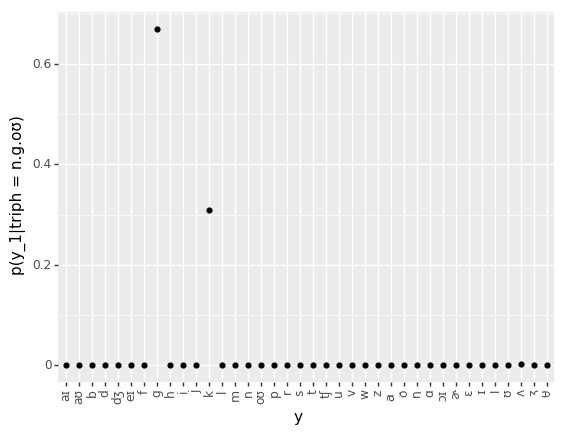

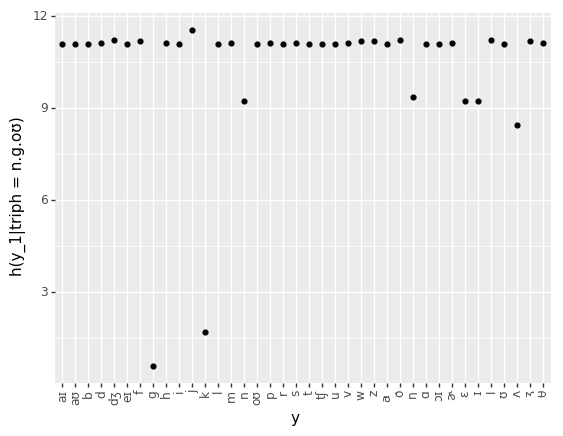

(    p(y_1|triph = n.g.oʊ)   y
 12               0.668707   g
 33               0.308315   k
 7                0.002844   ʌ
 5                0.001649   n
 19               0.001649   ɪ
 23               0.001649   ɛ
 32               0.001529   ŋ
 17               0.000454   ʊ
 35               0.000454  ɔɪ
 34               0.000454   ɑ
 31               0.000454   i
 29               0.000454  aɪ
 27               0.000454   u
 26               0.000454   b
 24               0.000454  tʃ
 0                0.000454   l
 37               0.000454  eɪ
 2                0.000454   r
 14               0.000454   æ
 13               0.000454   t
 6                0.000454  oʊ
 8                0.000454  aʊ
 30               0.000442   s
 1                0.000442   d
 3                0.000442   v
 21               0.000442   m
 22               0.000442   p
 4                0.000442   θ
 28               0.000442   h
 9                0.000442   ɚ
 16               0.000430   z
 15     

In [77]:
my_x012_analysis = channelDistAnalysis('y','p(y_1|triph = {0})'.format(my_triph), 'h(y_1|triph = {0})'.format(my_triph), my_triph, p3Y1X012)
my_x012_analysis

In [33]:
# p3Y1x012DF = [{'y_1':y, 'p(y_1|triph = {0})'.format(my_triph):p3Y1X012[my_triph][y]}
#          for y in p3Y1X012[my_triph]]
# p3Y1x012DF = pd.DataFrame(data = p3Y1x012DF)
# p3Y1x012DF.head()

,p(y_1|triph = n.g.oʊ),y_1
0,0.000454,l
1,0.000442,d
2,0.000454,r
3,0.000442,v
4,0.000442,θ


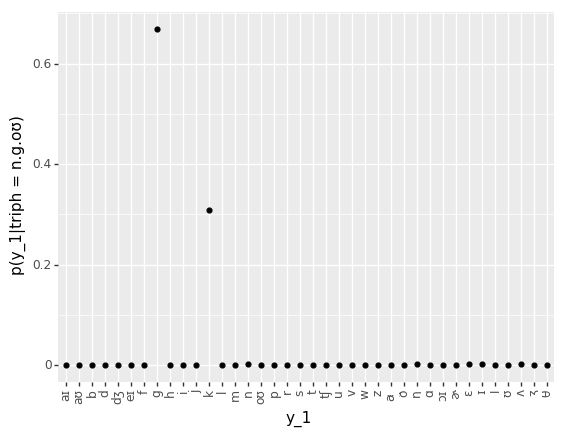

<ggplot: (7551363427)>

In [34]:
# ggplot(p3Y1x012DF, aes(x="y_1", y='p(y_1|triph = {0})'.format(my_triph))) + geom_point() + theme(axis_text_x = element_text(rotation = 90))

In [35]:
# p3Y1x012DF.sort_values(['p(y_1|triph = {0})'.format(my_triph)], ascending = [False])

,p(y_1|triph = n.g.oʊ),y_1
12,0.668707,g
33,0.308315,k
7,0.002844,ʌ
5,0.001649,n
19,0.001649,ɪ
23,0.001649,ɛ
32,0.001529,ŋ
17,0.000454,ʊ
35,0.000454,ɔɪ
34,0.000454,ɑ


In [36]:
# h3Y1x012DF = [{'y_1':y, 'h(y_1|triph = {0})'.format(my_triph):h(p3Y1X012[my_triph][y])}
#          for y in p3Y1X012[my_triph]]
# h3Y1x012DF = pd.DataFrame(data = h3Y1x012DF)
# h3Y1x012DF.head()

,h(y_1|triph = n.g.oʊ),y_1
0,11.104982,l
1,11.143456,d
2,11.104982,r
3,11.143456,v
4,11.143456,θ


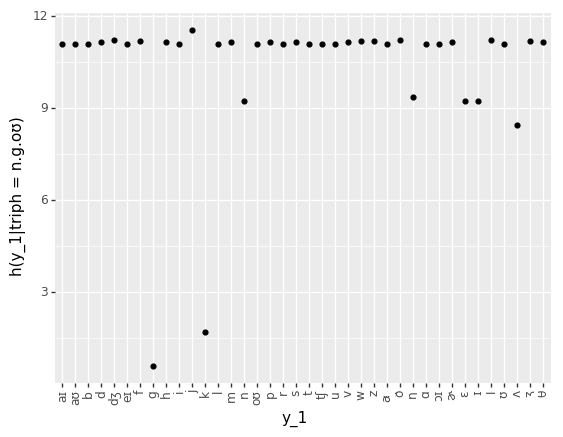

<ggplot: (-9223372029303519558)>

In [37]:
# ggplot(h3Y1x012DF, aes(x="y_1", y='h(y_1|triph = {0})'.format(my_triph))) + geom_point() + theme(axis_text_x = element_text(rotation = 90))

In [38]:
# h3Y1x012DF.sort_values(['h(y_1|triph = {0})'.format(my_triph)], ascending = [False])

,h(y_1|triph = n.g.oʊ),y_1
20,11.545555,j
36,11.221459,ð
18,11.221459,ʃ
10,11.221459,dʒ
11,11.182985,w
25,11.181930,f
15,11.181930,ʒ
16,11.181930,z
9,11.143456,ɚ
21,11.143456,m


## Triphones: pick a sound to analyze

In [42]:
my_x1 = random.choice(list(X1s))
# my_x1 = 't'
my_x1

't'

## Triphones: pick a context to analyze

# Features

## Alignment

### Grab a feature matrix

In [39]:
IPA = r.getSymbols()

In [40]:
print(IPA)

{'h', 'ʉ', 'ɹ', 'ɵ', 'b', 'ʙ', 'ɽ', 'ø', 'ʕ', 'ʝ', 'ʃ', 'ʊ', 'ɒ', 'j', 'c', 'ɲ', 'β', 'w', 'ɟ', 'x', 'æ', 'ɛ', 'ɡ', 'ħ', 'ɦ', 'q', 'ʐ', 'ʤ', 'd̪', 'ɱ', 'ɑ', 'r', 'ɭ', 'ɪ', 'z', 'ʀ', 'n̪', 's', 'e', 'ʈ', 'ɜ', 'ɞ', 'ɥ', 'v', 't̪', 'ɐ', 'ʧ', 'm', 'ʌ', 'ç', 'ɔ', 'ɣ', 'ɾ', 'ʁ', 'ʎ', 'y', 'ɸ', 'ʔ', 'ɶ', 'f', 'ŋ', 'ʋ', 'l', 'o', 'θ', 'p', 'œ', 'ɳ', 'i', 'ɯ', 'u', 'ʏ', 'χ', 'ɘ', 'ɴ', 'ð', 'ʣ', 'ʦ', 'd', 'l̪', 'ʟ', 'ɢ', 'ʒ', 'ⱱ', 'ɖ', 'n', 'ɨ', 'ʂ', 'ɻ', 'ɤ', 'k', 'ə', 'a', 't'}


### Match symbols in the source alphabet to feature matrix symbols

In [41]:
notInIPA = [each for each in Xs if each not in IPA]
notInIPA

['oʊ', 'aʊ', 'ɚ', 'dʒ', 'g', 'l̩', 'tʃ', 'aɪ', 'ɔɪ', 'eɪ']

In [42]:
[each for each in Ys if each not in IPA]

['aʊ', 'aɪ', 'ɚ', 'dʒ', 'tʃ', 'ɔɪ', 'g', 'eɪ', 'oʊ']

In [43]:
'ɡ' in IPA
'g' in IPA

True

False

In [44]:
def replaceThisWithThat(this, that, uniphChanDist):
    uniphChanDist[that] = uniphChanDist[this]
    del uniphChanDist[this]
    for eachSymbol in uniphChanDist:
        if this in uniphChanDist[eachSymbol]:
            uniphChanDist[eachSymbol][that] = uniphChanDist[eachSymbol][this]
            del uniphChanDist[eachSymbol][this]
    return uniphChanDist

pYX = replaceThisWithThat('tʃ', 'ʧ', pYX)
pYX = replaceThisWithThat('dʒ', 'ʤ', pYX)
pYX = replaceThisWithThat('g', 'ɡ', pYX)

In [45]:
l_fm = r.lookup_symbol('l', no_symbol = False)
l_fm

FrozenDict({'son': '+', 'cons': '+', 'labial': '-', 'lat': '+', 'voice': '+', 'syll': '-', 'front': '0', 'coronal': '+', 'dorsal': '-', 'low': '0', 'symbol': 'l', 'round': '0', 'nas': '-', 'ATR': '0', 'c.g.': '-', 'ant': '+', 'approx': '+', 'del. rel.': '0', 'cont': '-', 'back': '0', 'strid': '0', 's.g.': '-', 'high': '0', 'dist': '-'})

In [46]:
# TODO FIXME create a new symbol in fms that represents syllabic l
# literally add it to the feature matrix file

In [47]:
syll_l_fm = {k:l_fm[k] for k in l_fm}
syll_l_fm['syll'] = '+'
syll_l_fm['symbol'] = 'l̩'
syll_l_fm = FrozenDict(syll_l_fm)
syll_l_fm

FrozenDict({'son': '+', 'cons': '+', 'labial': '-', 'lat': '+', 'voice': '+', 'syll': '+', 'front': '0', 'coronal': '+', 'dorsal': '-', 'low': '0', 'symbol': 'l̩', 'round': '0', 'nas': '-', 'ATR': '0', 'c.g.': '-', 'ant': '+', 'approx': '+', 'del. rel.': '0', 'cont': '-', 'back': '0', 'strid': '0', 's.g.': '-', 'high': '0', 'dist': '-'})

In [48]:
# FIXME add function to roman.py for making a new feature matrix from an existing one but changing specified fields

def makeNewFMfromExistingFM(existing_fm, updates):
    """
    Given an existing feature matrix, make a new feature matrix but where the fields in 
    the keys of 'updates' are changed to have the values in 'updates'. ('updates' is a 
    dictionary.)
    """
    return pf.dict_update(existing_fm, updates)
#     new_FM = {k:existing_fm[k] for k in existing_fm}
#     new_FM.update(updates)
#     new_FM = FrozenDict(new_FM)
#     return new_FM

In [49]:
syll_l_fm = makeNewFMfromExistingFM(r.lookup_symbol('l', no_symbol = False), 
                                   {'syll':'+', 'symbol':'l̩'})
l_fm
syll_l_fm
pf.subtract_dicts(syll_l_fm, l_fm)

FrozenDict({'son': '+', 'cons': '+', 'labial': '-', 'lat': '+', 'voice': '+', 'syll': '-', 'front': '0', 'coronal': '+', 'dorsal': '-', 'low': '0', 'symbol': 'l', 'round': '0', 'nas': '-', 'ATR': '0', 'c.g.': '-', 'ant': '+', 'approx': '+', 'del. rel.': '0', 'cont': '-', 'back': '0', 'strid': '0', 's.g.': '-', 'high': '0', 'dist': '-'})

FrozenDict({'son': '+', 'cons': '+', 'labial': '-', 'lat': '+', 'voice': '+', 'syll': '+', 'front': '0', 'coronal': '+', 'dorsal': '-', 'low': '0', 'symbol': 'l̩', 'round': '0', 'nas': '-', 'ATR': '0', 'c.g.': '-', 'ant': '+', 'approx': '+', 'del. rel.': '0', 'cont': '-', 'back': '0', 'strid': '0', 's.g.': '-', 'high': '0', 'dist': '-'})

FrozenDict({'syll': '+', 'symbol': 'l̩'})

In [50]:
r.IPA = r.addToInventory(syll_l_fm)

In [51]:
r.lookup_symbol('l̩')

FrozenDict({'son': '+', 'cons': '+', 'labial': '-', 'lat': '+', 'voice': '+', 'syll': '+', 'front': '0', 'coronal': '+', 'dorsal': '-', 'low': '0', 'round': '0', 'nas': '-', 'ATR': '0', 'c.g.': '-', 'ant': '+', 'approx': '+', 'del. rel.': '0', 'cont': '-', 'back': '0', 'strid': '0', 's.g.': '-', 'high': '0', 'dist': '-'})

In [52]:
# map diphthongs to a sequence of feature matrices

In [53]:
# merge 'ɚ' into 'ə'

In [51]:
pYschwar = pYX['ɚ']
pYschwar

{'l': 0.006557327618551349,
 'd': 0.006224385998390058,
 'r': 0.0224868741479912,
 'v': 0.006746263374194587,
 'θ': 0.00674494301492678,
 'n': 0.006308046793730943,
 'oʊ': 0.007305170093012571,
 'ʌ': 0.00878179957290751,
 'aʊ': 0.00650621257129381,
 'ɚ': 0.7303055029970906,
 'dʒ': 0.006329660958692402,
 'w': 0.0064146421133010854,
 'g': 0.00657932298544726,
 't': 0.008361155179516326,
 'æ': 0.006735419815432821,
 'ʒ': 0.0064133217540332955,
 'z': 0.006142045562316971,
 'ʊ': 0.006308046793730943,
 'ʃ': 0.00632966095869241,
 'ɪ': 0.008858520387109338,
 'j': 0.00684102339158172,
 'm': 0.006422551775952917,
 'p': 0.006744943014926788,
 'ɛ': 0.009653471823624814,
 'tʃ': 0.006308046793730943,
 'f': 0.006340211339879838,
 'b': 0.008129270354995163,
 'u': 0.006557327618551349,
 'h': 0.007288815757627263,
 'aɪ': 0.006464143623716501,
 's': 0.006496982549374173,
 'i': 0.0065793229854472675,
 'ŋ': 0.005471438840322089,
 'k': 0.006225706357657857,
 'ɑ': 0.007598178029243218,
 'ɔɪ': 0.0065573276185

In [52]:
pYschwa = pYX['ə']
pYschwa

{'l': 0.009657067625413133,
 'd': 0.010749788136828625,
 'r': 0.011438802722137799,
 'v': 0.009530012741352543,
 'θ': 0.009529989150910214,
 'n': 0.01030521437066087,
 'oʊ': 0.03831601047656068,
 'ʌ': 0.24736606120705362,
 'aʊ': 0.013463611000521517,
 'ɚ': 0.03948361950189512,
 'dʒ': 0.009275855792346709,
 'w': 0.00964567866040656,
 'g': 0.010492245309465362,
 't': 0.01045927776930541,
 'æ': 0.01110478481972402,
 'ʒ': 0.009402934266849626,
 'z': 0.009402934266849626,
 'ʊ': 0.036591003836040636,
 'ʃ': 0.009275855792346709,
 'ɪ': 0.06378952952525879,
 'j': 0.008963643984877305,
 'm': 0.009529989150910214,
 'p': 0.009914610452776381,
 'ɛ': 0.07371381650226369,
 'tʃ': 0.009657067625413133,
 'f': 0.01099610723542832,
 'b': 0.013382184785590077,
 'u': 0.010876866611331547,
 'h': 0.011785017957503287,
 'aɪ': 0.025677871111015216,
 's': 0.00972251663955646,
 'i': 0.012953177007714617,
 'ŋ': 0.008386282880384012,
 'k': 0.009530012741352543,
 'ɑ': 0.049399026357133814,
 'ɔɪ': 0.02887196912292689

In [54]:
Xs = pYX.keys()
Ys = union([set(pYX[x].keys()) for x in Xs])
len(Xs)
len(Ys)
Xs - Ys
Ys - Xs

40

38

{'l̩', 'ə'}

set()

### Convert IPA symbols to tuples of FMs

In [55]:
pYX['m']

{'l': 0.015614786671252892,
 'd': 0.009927301791559331,
 'r': 0.010053985984495346,
 'v': 0.012141866279135004,
 'θ': 0.010333290943529179,
 'n': 0.038573174963098034,
 'oʊ': 0.010555423889065423,
 'ʌ': 0.03126213773001695,
 'aʊ': 0.010053985984495344,
 'ɚ': 0.009520786371973972,
 'w': 0.013303250412598049,
 't': 0.009647996832525482,
 'æ': 0.009647996832525482,
 'ʒ': 0.010049372155828226,
 'z': 0.009800091331007805,
 'ʊ': 0.01030326680931576,
 'ʃ': 0.009267417986101941,
 'ɪ': 0.012675065891656359,
 'j': 0.009187870530950172,
 'm': 0.5537544617213489,
 'p': 0.010333290943529172,
 'ɛ': 0.009897277657345892,
 'f': 0.009394102179037963,
 'b': 0.012639366730370319,
 'u': 0.010160407416878549,
 'h': 0.012590045901017421,
 'aɪ': 0.010153482949522428,
 's': 0.009520786371973972,
 'i': 0.010310191276671864,
 'ŋ': 0.0179899170275994,
 'k': 0.009520786371973972,
 'ɑ': 0.011093299753689504,
 'ɔɪ': 0.009647996832525482,
 'ð': 0.009516698810922361,
 'eɪ': 0.009904202124702017,
 'ʧ': 0.0103032668093

In [56]:
pYX['ɚ']

{'l': 0.006557327618551349,
 'd': 0.006224385998390058,
 'r': 0.0224868741479912,
 'v': 0.006746263374194587,
 'θ': 0.00674494301492678,
 'n': 0.006308046793730943,
 'oʊ': 0.007305170093012571,
 'ʌ': 0.00878179957290751,
 'aʊ': 0.00650621257129381,
 'ɚ': 0.7303055029970906,
 'w': 0.0064146421133010854,
 't': 0.008361155179516326,
 'æ': 0.006735419815432821,
 'ʒ': 0.0064133217540332955,
 'z': 0.006142045562316971,
 'ʊ': 0.006308046793730943,
 'ʃ': 0.00632966095869241,
 'ɪ': 0.008858520387109338,
 'j': 0.00684102339158172,
 'm': 0.006422551775952917,
 'p': 0.006744943014926788,
 'ɛ': 0.009653471823624814,
 'f': 0.006340211339879838,
 'b': 0.008129270354995163,
 'u': 0.006557327618551349,
 'h': 0.007288815757627263,
 'aɪ': 0.006464143623716501,
 's': 0.006496982549374173,
 'i': 0.0065793229854472675,
 'ŋ': 0.005471438840322089,
 'k': 0.006225706357657857,
 'ɑ': 0.007598178029243218,
 'ɔɪ': 0.006557327618551349,
 'ð': 0.00632966095869241,
 'eɪ': 0.007553254475785117,
 'ʧ': 0.00630804679373

In [57]:
pYX['ə']

{'l': 0.009657067625413133,
 'd': 0.010749788136828625,
 'r': 0.011438802722137799,
 'v': 0.009530012741352543,
 'θ': 0.009529989150910214,
 'n': 0.01030521437066087,
 'oʊ': 0.03831601047656068,
 'ʌ': 0.24736606120705362,
 'aʊ': 0.013463611000521517,
 'ɚ': 0.03948361950189512,
 'w': 0.00964567866040656,
 't': 0.01045927776930541,
 'æ': 0.01110478481972402,
 'ʒ': 0.009402934266849626,
 'z': 0.009402934266849626,
 'ʊ': 0.036591003836040636,
 'ʃ': 0.009275855792346709,
 'ɪ': 0.06378952952525879,
 'j': 0.008963643984877305,
 'm': 0.009529989150910214,
 'p': 0.009914610452776381,
 'ɛ': 0.07371381650226369,
 'f': 0.01099610723542832,
 'b': 0.013382184785590077,
 'u': 0.010876866611331547,
 'h': 0.011785017957503287,
 'aɪ': 0.025677871111015216,
 's': 0.00972251663955646,
 'i': 0.012953177007714617,
 'ŋ': 0.008386282880384012,
 'k': 0.009530012741352543,
 'ɑ': 0.049399026357133814,
 'ɔɪ': 0.028871969122926895,
 'ð': 0.009275855792346709,
 'eɪ': 0.10808370706953016,
 'ʧ': 0.009657067625413133,

In [58]:
pYX_fms = {tuple(r.wordToFMs(x)):{tuple(r.wordToFMs(y)):pYX[x][y] for y in pYX[x]} for x in pYX}
pYX_fms.keys()

Exception: Error: ɚ has no matching feature matrix.